<a href="https://colab.research.google.com/github/xpdlaldam/nlp/blob/master/stemming_and_lemmatization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 6/10/2024 13. Stemming & Lemmatization
## Stemming is very crude as it just chops off the end of the word => the result is not necessarily a real word ex) better -> better

## Lemmatization is more sophisticated as it uses actual rules of language => the true root word will be returned ex) better -> good

## Parts-of-Speech (POS) matters as "going" can be a noun but when the root form is "go" it is not a noun

lemmatizer.lemmatize("mice") # returns "mouse"

lemmatizer.lemmatize("going", pos=wordnet.NOUN) # returns "going"
lemmatizer.lemmatize("going", pos=wordnet.VERB) # returns 'go'





# 14.Stemming & Lemmatization Demo 6/16/2024

In [1]:
import nltk
from nltk.stem import PorterStemmer

from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
porter = PorterStemmer()

In [ ]:
porter.stem("walking")

In [ ]:
porter.stem("walked")

In [ ]:
porter.stem("ran") # wrong stemming

'ran'

In [ ]:
sentence = "Lemmatization is more sophisticated than stemming".split()
for token in sentence:
  # print(porter.stem(token), end=" ") # end = " " is to print the result in a single line
  print(porter.stem(token))

lemmat
is
more
sophist
than
stem


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatizer.lemmatize("walking") # default: pos=wordnet.NOUN

'walking'

In [ ]:
lemmatizer.lemmatize("walking", pos=wordnet.VERB)

'walk'

In [ ]:
lemmatizer.lemmatize("ran", pos=wordnet.VERB)

'run'

In [ ]:
lemmatizer.lemmatize("was", pos=wordnet.VERB)

'be'

In [ ]:
lemmatizer.lemmatize("better", pos=wordnet.ADJ)

'good'

In [ ]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith("J"):
    return wordnet.ADJ
  elif treebank_tag.startswith("V"):
    return wordnet.VERB
  elif treebank_tag.startswith("N"):
    return wordnet.NOUN
  elif treebank_tag.startswith("R"):
    return wordnet.ADJ
  else:
    return wordnet.NOUN

In [ ]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
sentence = "Donald Trump has a devoted following".split()
words_and_tags = nltk.pos_tag(sentence)
words_and_tags

[('Donad', 'NNP'),
 ('Trump', 'NNP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('devoted', 'VBN'),
 ('following', 'NN')]

In [ ]:
for word, tag in words_and_tags:
  lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
  print(lemma, end=" ")

Donad Trump have a devote following 

In [ ]:
sentence = "The cat was following the bird as it flew by".split()
words_and_tags = nltk.pos_tag(sentence)
words_and_tags

[('The', 'DT'),
 ('cat', 'NN'),
 ('was', 'VBD'),
 ('following', 'VBG'),
 ('the', 'DT'),
 ('bird', 'NN'),
 ('as', 'IN'),
 ('it', 'PRP'),
 ('flew', 'VBD'),
 ('by', 'IN')]

In [ ]:
for word, tag in words_and_tags:
  lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
  print(lemma, end=" ")

The cat be follow the bird a it fly by 

# 15. Count Vectorizer

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [3]:
## download data for nltk
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!gsutil cp gs://dataset-uploader/bbc/bbc-text.csv .

Copying gs://dataset-uploader/bbc/bbc-text.csv...
- [1 files][  4.8 MiB/  4.8 MiB]                                                
Operation completed over 1 objects/4.8 MiB.                                      


In [8]:
df = pd.read_csv("bbc-text.csv")

In [9]:
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [11]:
inputs = df['text']
labels = df['category']

<Axes: >

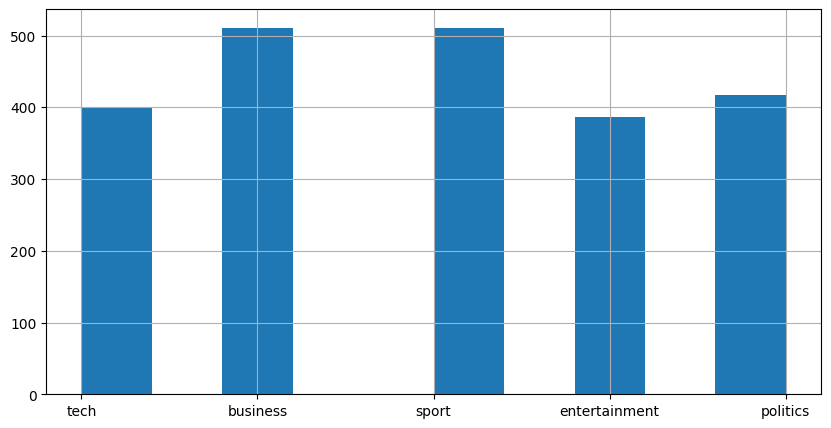

In [12]:
labels.hist(figsize=(10, 5))

In [13]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(
    inputs, labels, random_state=123)

In [14]:
vectorizer = CountVectorizer()

In [16]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [17]:
Xtrain

<1668x25997 sparse matrix of type '<class 'numpy.int64'>'
	with 336528 stored elements in Compressed Sparse Row format>

In [20]:
(Xtrain != 0).sum()

336528

In [22]:
# what percentage of values are non-zero?
# < 1% => most values are non-zeros
# thus, makes sense to use a sparse matrix
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.007760718378407248

In [23]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9928057553956835
test score: 0.9766606822262118


In [24]:
# using stopwords (default: stopwords are not removed)
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9940047961630696
test score: 0.9730700179533214


In [27]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [25]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()

  # call an object as if it were a function
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [28]:
# with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9946043165467626
test score: 0.9730700179533214


In [29]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [30]:
# with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9922062350119905
test score: 0.9748653500897666


In [31]:
def simple_tokenizer(s):
  return s.split()

In [32]:
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9934052757793765
test score: 0.9694793536804309
